# BONUS

###### As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

In [1]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing sql database and creating engine to bypass connestion
from sqlalchemy import create_engine
engine=create_engine("postgresql://postgres:"INSERT PASSWORD"@localhost:5432/SQL_Challenge")
conn=engine.connect()

In [3]:
#query the salary tables data
#online resource to find how to query data:"https://pythontic.com/pandas/serialization/postgresql"
salary_data=pd.read_sql("select * from salaries",conn)
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
#query data from the titles table
title_data=pd.read_sql("select * from titles",conn)
title_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [5]:
#query data from employees table
employee_data=pd.read_sql("select * from employees",conn)
employee_data.head()

,emp_no,emp_tit,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
#combining salary and employees table
employee_salary=pd.merge(employee_data, salary_data, on="emp_no", how="inner")
employee_salary.head()

,emp_no,emp_tit,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [7]:
#converting the "Title ID" column name in titles table to "emp_tit"
title_data=title_data.rename(
    columns={"title_id":"emp_tit"})
title_data.head()

,emp_tit,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [8]:
#merge the "Employee Salary" data with "title data"
title_salary=pd.merge(employee_salary, title_data, on="emp_tit", how="inner")
title_salary.head()

,emp_no,emp_tit,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [9]:
#Group information by title
group_title=round(title_salary.groupby("title").mean(),2)
group_title

,emp_no,salary
title,,
Assistant Engineer,252992.60,48564.43
Engineer,253654.35,48535.34
Manager,110780.83,51531.04
Senior Engineer,253038.75,48506.80
Senior Staff,254481.80,58550.17
Staff,253408.50,58465.38
Technique Leader,251811.43,48582.90


In [10]:
#resetting index
group_title_reset=group_title.reset_index()
group_title_reset

,title,emp_no,salary
0,Assistant Engineer,252992.60,48564.43
1,Engineer,253654.35,48535.34
2,Manager,110780.83,51531.04
3,Senior Engineer,253038.75,48506.80
4,Senior Staff,254481.80,58550.17
5,Staff,253408.50,58465.38
6,Technique Leader,251811.43,48582.90


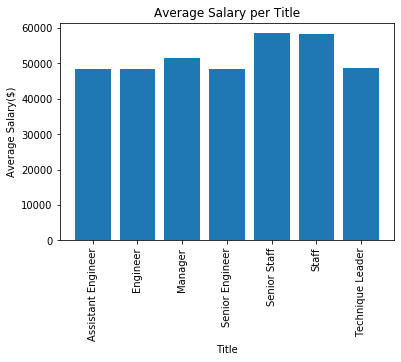

In [11]:
#creating bar chart
x_axis=group_title_reset["title"]
ticks=np.arange(len(x_axis))
y_axis=group_title_reset["salary"]
plt.xticks(ticks, x_axis, rotation="vertical")

plt.bar(x_axis,y_axis)
plt.title("Average Salary per Title")
plt.xlabel("Title")
plt.ylabel("Average Salary($)")

plt.show()

In [12]:
#creating a histogram of the data
first_n=[]
last_n=[]
salary=[]

hist_result=engine.execute("select employees.first_name, employees.last_name, salaries.salary from employees inner join salaries on employees.emp_no=salaries.emp_no")
for r in hist_result:
    first_n.append(r.first_name)
    last_n.append(r.last_name)
    salary.append(float(r.salary))

In [13]:
common_salary=pd.DataFrame({"First name":first_n, "Last name":last_n, "Salary":salary})
common_salary["Salary"].max()

129492.0

Text(0.5, 1.0, 'Salary vs Number of employees')

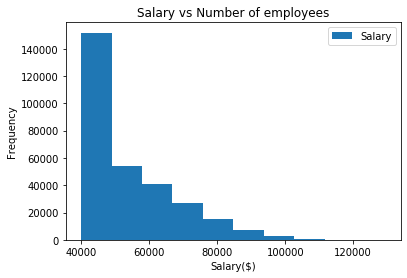

In [14]:
common_salary.plot(kind="hist")
plt.xlabel("Salary($)")
plt.title("Salary vs Number of employees")